# Chapter 3: Logistic Regression

- This Jupyter Notebook is a supplement for the [Machine Learning Simplified](themlsbook.com) book. Note that all detailed explanations are written in the book. This notebook just shed light on Python implementations of the topics discussed.
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my notebooks. 

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp
import pandas as pd
from sklearn.linear_model import LinearRegression #import Linear Regression model

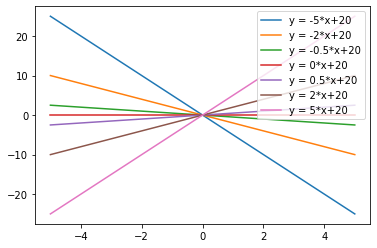

In [229]:
for i in [-5,-2,-0.5, 0, 0.5, 2, 5]:
    # 100 linearly spaced numbers
    x = np.linspace(-5,5,100)
    
    y = i*x
    
    plt.plot(x,y, label=f'y = {i}*x+20')
    plt.legend(); #show legend



# # 100 linearly spaced numbers
# x = np.linspace(-5,5,100)


# y = 1.3*x+20
# y2 = 2*x+20

# plt.plot(x,y, 'r', label='y = 1.3*x+20')
# plt.legend(); #show legend

# plt.plot(x,y2, 'g', label='y = 1.3*x+20')

> Logistic regression

In [230]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta) + 2

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))



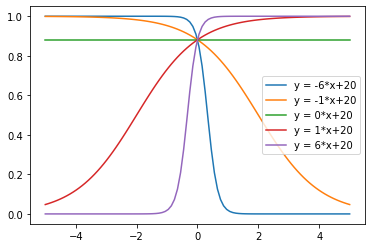

In [231]:
for i in [-6,-1, 0, 1, 6]:
    # 100 linearly spaced numbers
    x = np.linspace(-5,5,100)
    y = probability(i, x)
    
    plt.plot(x,y, label=f'y = {i}*x+20')
    plt.legend(); #show legend

## 1.3 x - 2 

In [127]:
theta = 1.3
intercept = -2

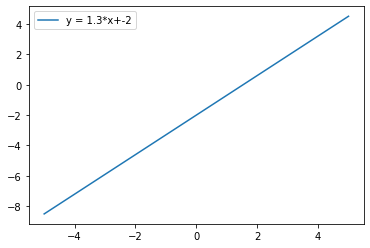

In [131]:
# linear regression

x = np.linspace(-5,5,100)   
y = theta*x-2
   
plt.plot(x,y, label=f'y = {theta}*x+{intercept}')
plt.legend(); #show legend

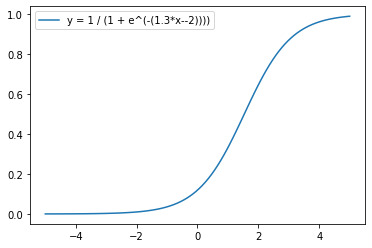

In [135]:
# logistic regression

x = np.linspace(-5,5,100)
y = sigmoid(np.dot(x, theta) - 2)

plt.plot(x,y, label=f'y = 1 / (1 + e^(-({theta}*x-{intercept}))))')
plt.legend(); #show legend

## -2x + 9

In [143]:
theta = -0.5
intercept = 9

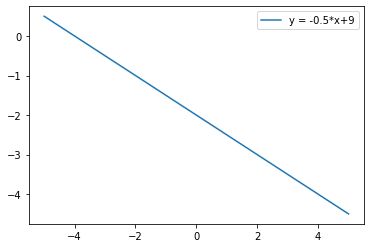

In [144]:
# linear regression

x = np.linspace(-5,5,100)   
y = theta*x-2
   
plt.plot(x,y, label=f'y = {theta}*x+{intercept}')
plt.legend(); #show legend

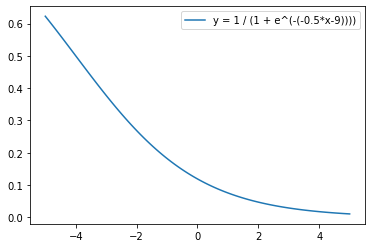

In [149]:
# logistic regression

x = np.linspace(-5,5,100)
y = sigmoid(np.dot(x, theta) - 2)

plt.plot(x,y, label=f'y = 1 / (1 + e^(-({theta}*x-{intercept}))))')
plt.legend(); #show legend

# start

In [311]:
# Create a hypothetical dataset from the MLS book
data = {'m_sq': [15, 
                 21,
                 23,
                 50, 
                 35, 
                 37, 
                 55, 
                 61, 
                 66, 
                 84,
                 102], 
        'property': ['Studio', 
                     'Studio', 
                     'Studio', 
                     'Studio', 
                     'Apartment', 
                     'Apartment', 
                     'Apartment', 
                     'Apartment', 
                     'Apartment', 
                     'Apartment',
                     'Apartment']
       }  

# Create DataFrame df using pandas library
df = pd.DataFrame(data)  
  
# Print the output
df


,m_sq,property
0,15,Studio
1,21,Studio
2,23,Studio
3,50,Studio
4,35,Apartment
5,37,Apartment
6,55,Apartment
7,61,Apartment
8,66,Apartment
9,84,Apartment


In [312]:
x = df.m_sq.values
y = df.property

(0.0, 110.0)

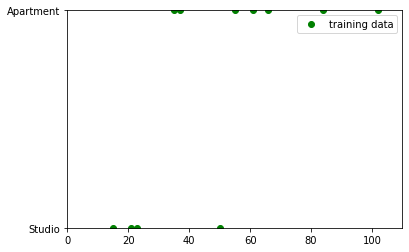

In [313]:
fig, ax = plt.subplots() #define the graph
ax.plot(x, y, 'o', color='g', label='training data')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 110) #length of x-axis

## Plot the linear regression

> First, let's turn a target variable `y=[Apartment, Studio]`  into numerical format `y=[1,0]`.

In [314]:
# Turn categorical target variable into numerical 
# 0 - Not Apartment
# 1 - Apartment

# Let's do it manually

for i in range(len(df)): 
    if y[i] == 'Apartment':
        y[i] = 1
    else: y[i] = 0


<ipython-input-314-0980b56f0e2d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: y[i] = 0
<ipython-input-314-0980b56f0e2d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1


In [315]:
reg = LinearRegression() #define the model
x=x.reshape((-1, 1)) #reshape x
reg = LinearRegression().fit(x, y) #train your model with x-values

(0.0, 110.0)

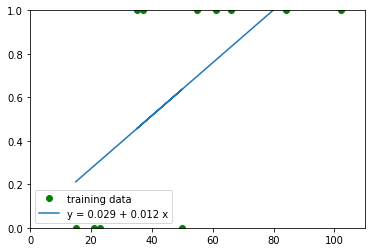

In [316]:
fig, ax = plt.subplots() #define the graph
ax.plot(x, y, 'o', color='g', label='training data')
ax.plot(x, reg.intercept_ + reg.coef_[0]*x, label=f'y = {reg.intercept_.round(3)} + {reg.coef_[0].round(3)} x') 
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(0, 110) #length of x-axis

## Plot Logistic Regression

For Linear Regression, we had the hypothesis y_hat = w.X +b , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is: 

y_hat = sigmoid(w.X + b) 

, whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$\hat{y}=\frac{1}{1+e^{-(\theta_1*x+\theta_0)}}$

In [317]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

(15.0, 85.0)

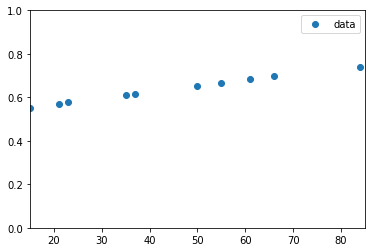

In [318]:
# logistic regression

z = reg.intercept_ + reg.coef_[0]*x
y = sigmoid(z)



plt.plot(x, y, 'o', label='data')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(15, 85) #length of x-axis

In [ ]:
# logistic regression

z = reg.intercept_ + reg.coef_[0]*x
y = sigmoid(z)



plt.plot(x, y, 'o', label=f'y = 1 / (1 + e^(-({theta}*x-{intercept}))))')
plt.legend(); #show legend
plt.ylim(0, 1) #length of y-axis
plt.xlim(15, 85) #length of x-axis